In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.mixture import GaussianMixture
from osgeo import gdal
import sys
import signal
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skimage.util.shape import view_as_windows
from scipy.stats import mode
from tqdm import tqdm
from utils import extract_patches, load_train_data, filter_class, load_classes,\
    labels2groups, pixels2histogram, normalize_to_255
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join('data', 'meta.csv')
df = pd.read_csv(data_path)

print(df['Grid'].value_counts())

df = df[df.Grid == 1]
df = df[df.Season == 'Summer']
print(df.shape)
# Get random sample from train_data
df = df.sample(frac=5e-2)
print('Dataset size:', df.shape)

data, labels = load_train_data(df['Path'].values.tolist())
# data = data.reshape(data.shape[0], -1)
# labels = labels.reshape(labels.shape[0], -1)
print(data.shape, labels.shape)

filtered_data, filtered_labels = filter_class(data, labels, 12)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 15)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 17)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 16)
filtered_data, filtered_labels = filter_class(filtered_data, filtered_labels, 33,\
    percentage_limit=0.9)
data, labels = filtered_data, filtered_labels
print(data.shape, labels.shape)

Grid
1    880456
2    879374
Name: count, dtype: int64
(240826, 19)
Dataset size: (12041, 19)
(12041, 120, 120, 3) (12041, 120, 120)


100%|██████████| 12041/12041 [00:00<00:00, 42910.80it/s]


Original number of patches: 12041
Filtered number of patches: 9651


100%|██████████| 9651/9651 [00:00<00:00, 40120.27it/s]


Original number of patches: 9651
Filtered number of patches: 9299


100%|██████████| 9299/9299 [00:00<00:00, 41932.35it/s]


Original number of patches: 9299
Filtered number of patches: 8540


100%|██████████| 8540/8540 [00:00<00:00, 46542.04it/s]


Original number of patches: 8540
Filtered number of patches: 8329


100%|██████████| 8329/8329 [00:00<00:00, 33868.65it/s]


Original number of patches: 8329
Filtered number of patches: 7707
(7707, 120, 120, 3) (7707, 120, 120)


In [3]:
classes_df = load_classes('data/classes.csv')
grouped_classes_df = pd.read_csv('data/class_groups.csv')
classes_df = pd.merge(classes_df.reset_index(), grouped_classes_df, on='Class')
labels = labels2groups(classes_df, labels)
groups_df = grouped_classes_df[['Group_ID', 'Group', 'Group_Color']].drop_duplicates()
# groups_df.set_index('Group_ID', inplace=True)

Áreas Urbanas
Min: 0, Max: 255
(13544603,)


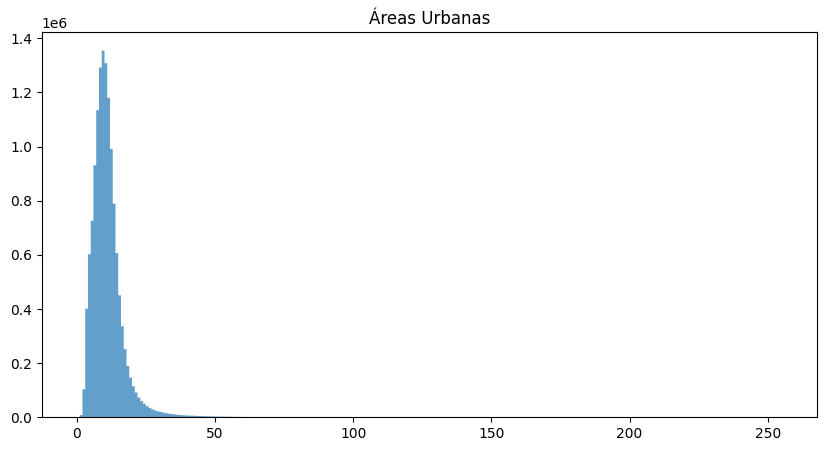

Áreas Agrícolas
Min: 0, Max: 255
(53054737,)


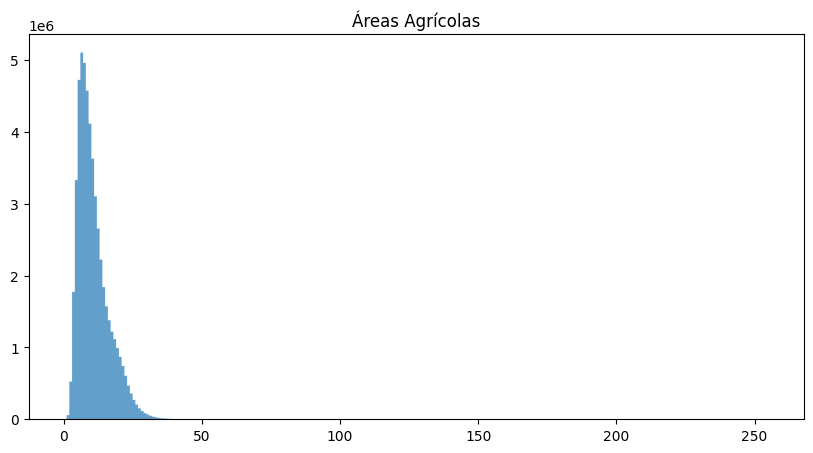

Vegetação Natural
Min: 0, Max: 255
(38629338,)


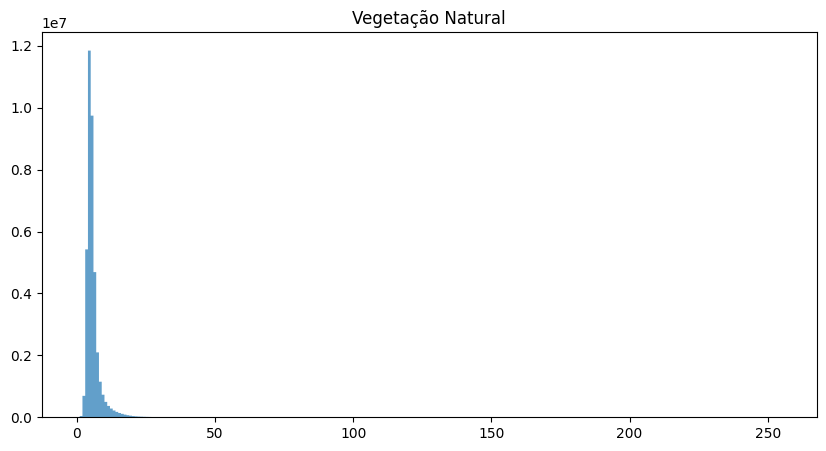

Terrenos Naturais e Descobertos
Min: 0, Max: 255
(2162827,)


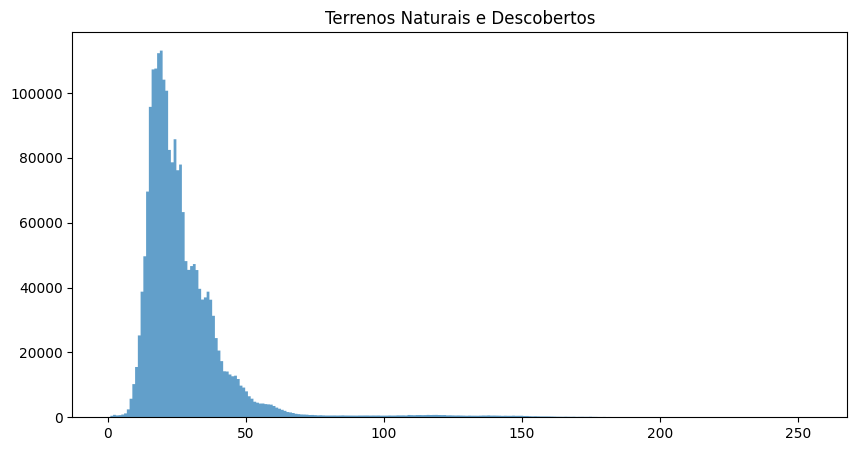

Extração e Descarte
Min: 0, Max: 255
(513924,)


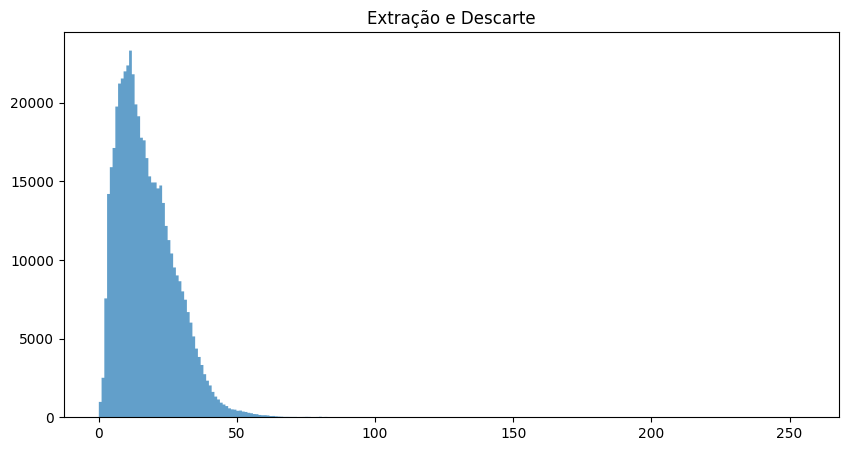

Água
Min: 0, Max: 255
(3075371,)


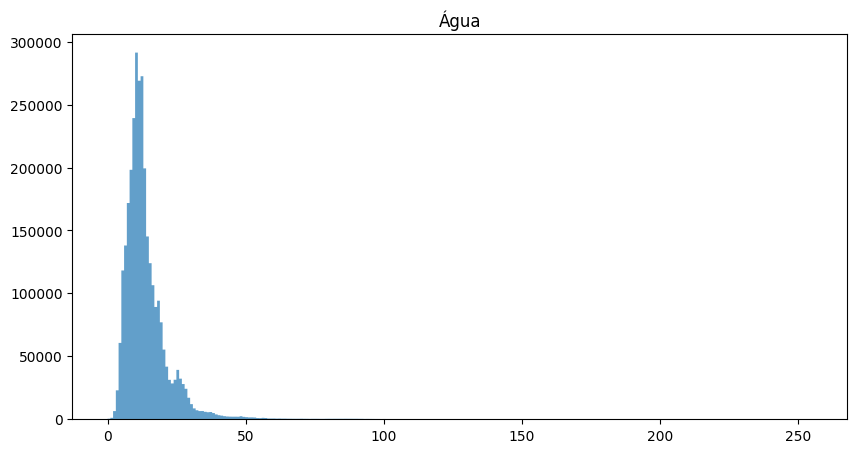

In [5]:
groups = groups_df[['Group_ID', 'Group']].drop_duplicates().values

for id, group in groups:
    print(group)
    pixels_group = data[labels == id]
    pixels_group = normalize_to_255(np.mean(pixels_group, axis=1))
    print(f"Min: {pixels_group.min()}, Max: {pixels_group.max()}")
    print(pixels_group.shape)
    # hist_group = pixels2histogram(pixels_group)
    # print(hist_group.shape)
    plt.figure(figsize=(10, 5))
    plt.hist(pixels_group, bins=256, histtype='stepfilled', alpha=0.7)
    plt.title(group)
    plt.show()
    plt.close()

